In [3]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from scipy.spatial.distance import cosine
import cv2

# Function to load an image and prepare it for VGG16 model
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

# Function to extract features using VGG16
def extract_features(model, image_path):
    image = load_and_preprocess_image(image_path)
    features = model.predict(image)
    return features.flatten()

# Load VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Path to query image and database folder
query_image_path = 'querry.jpg'
database_folder_path = 'dataBase'

# Extract features of the query image
query_features = extract_features(model, query_image_path)

# Extract features of images in the database and find the most similar one
min_distance = float('inf')
most_similar_image = None

for filename in os.listdir(database_folder_path):
    if filename.endswith('.jpg'):
        database_image_path = os.path.join(database_folder_path, filename)
        database_image_features = extract_features(model, database_image_path)
        distance = cosine(query_features, database_image_features)
        
        if distance < min_distance:
            min_distance = distance
            most_similar_image = filename

print(f"The most similar image to the query image is: {most_similar_image}")


1/1 [==============================] - 0s 200ms/step
The most similar image to the query image is: 14.jpg


In [6]:
img = cv2.imread(os.path.join('dataBase','14.jpg'))

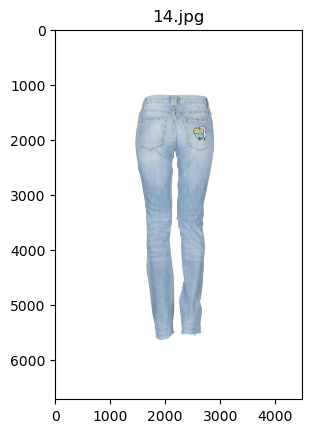

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # ploting Image using matplotlib ------->>
plt.title(most_similar_image)
plt.show()